In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
from matplotlib import pyplot
sns.set_theme(style="white")

In [179]:
df=pd.read_csv('/Users/lucas_botella/Downloads/df_covid_processed_FINAL.csv')
del df['Unnamed: 0']

In [180]:
df.head()

,Code,Date,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,contact_tracing,testing_policy,...,"Excess mortality P-scores, all ages Prev 7 days","Excess mortality P-scores, all ages",month,average_deaths_2015_2019_all_ages,deaths_prev_7,deaths_prev_18,deaths_prev_36,deaths,accumulated,R0
0,AUS,2020-03-08,1.050000,1.722333,-0.739000,4.977667,-2.089000,7.927667,2.0,1.0,...,4.92,4.67,3,3126.25,153.811500,193.202250,160.064000,145.995875,0.000762,0.949187
1,AUS,2020-03-15,0.761714,1.510143,-1.286000,7.697286,-0.819857,10.567714,2.0,1.0,...,4.67,4.62,3,3126.25,145.995875,141.619125,103.791500,144.432750,0.001320,0.989293
2,AUS,2020-03-22,1.285714,3.367429,-1.081714,9.346857,0.938857,10.877857,2.0,1.0,...,4.62,7.28,3,3126.25,144.432750,153.811500,138.180250,227.591000,0.001926,1.575758
3,AUS,2020-03-29,0.714429,8.979571,-0.387571,5.448857,-2.857143,8.326571,2.0,1.0,...,7.28,12.13,3,3126.25,227.591000,145.995875,193.202250,379.214125,0.002502,1.666209
4,AUS,2020-04-05,-0.898000,15.163286,0.448857,-1.061286,-4.959143,6.959000,2.0,1.0,...,12.13,11.31,4,2564.75,311.104175,118.491450,116.183175,290.073225,0.002969,0.932399


In [181]:
df.columns

Index(['Code', 'Date', 'retail_and_recreation', 'grocery_and_pharmacy',
       'residential', 'transit_stations', 'parks', 'workplaces',
       'contact_tracing', 'testing_policy', 'international_travel_controls',
       'restrictions_internal_movements', 'close_public_transport',
       'public_information_campaigns', 'facial_coverings',
       'stay_home_requirements', 'restriction_gatherings',
       'cancel_public_events', 'workplace_closures', 'school_closures',
       'debt_relief', 'income_support', 'Holiday', 'temp', 'prcp',
       'doctors_per_1000', 'nurses_per_1000', 'beds_per_1000',
       'number_of_arrivals', 'urban_population', 'total_vaccinations_per_100',
       '%youth_unemployment_total', 'life_expectancy', '%df_population_gr_65',
       'UN Population Division (Median Age) (2017)',
       'Excess mortality P-scores, all ages Prev 36 days',
       'Excess mortality P-scores, all ages Prev 18 days',
       'Excess mortality P-scores, all ages Prev 7 days',
       'Exc

In [182]:
df=df[['Code', 'Date','retail_and_recreation', 'grocery_and_pharmacy',
       'residential', 'transit_stations', 'parks', 'workplaces',
       'contact_tracing', 'testing_policy', 'international_travel_controls',
       'restrictions_internal_movements', 'close_public_transport',
       'public_information_campaigns', 'facial_coverings',
       'stay_home_requirements', 'restriction_gatherings',
       'cancel_public_events', 'workplace_closures', 'school_closures',
       'debt_relief', 'income_support', 'Holiday', 'temp', 'prcp',
       'doctors_per_1000', 'nurses_per_1000', 'beds_per_1000',
       'number_of_arrivals', 'urban_population', 'total_vaccinations_per_100',
       '%youth_unemployment_total', 'life_expectancy', '%df_population_gr_65',
       'UN Population Division (Median Age) (2017)', 'Excess mortality P-scores, all ages', 
        'deaths', 'accumulated', 'R0']]
df.describe()

,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,contact_tracing,testing_policy,international_travel_controls,restrictions_internal_movements,...,urban_population,total_vaccinations_per_100,%youth_unemployment_total,life_expectancy,%df_population_gr_65,UN Population Division (Median Age) (2017),"Excess mortality P-scores, all ages",deaths,accumulated,R0
count,2042.000000,2042.000000,2042.000000,2042.000000,2039.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,...,1999.000000,217.000000,1999.000000,1999.000000,1999.000000,2042.000000,2042.000000,2042.000000,1999.000000,2041.000000
mean,-25.836803,-6.827742,8.906561,-30.797548,23.923160,-25.262676,1.450958,1.991045,2.794529,0.871485,...,75.922796,3.833313,13.259250,79.973979,17.724051,40.848874,16.025220,1159.712029,0.060338,NaN
std,23.729264,14.068653,7.772479,20.450273,64.247798,15.931595,0.645710,0.785700,1.007788,0.867270,...,12.393774,7.672107,6.874484,2.895795,4.307626,5.204682,27.319743,3330.294171,0.069376,NaN
min,-91.245143,-66.122429,-5.020429,-85.877714,-83.183571,-77.836857,0.000000,0.000000,0.000000,0.000000,...,50.680000,0.000000,4.880000,74.063000,4.928984,22.900000,-24.090000,-3665.628000,0.000000,-inf
25%,-42.403071,-12.530714,2.469429,-45.449107,-14.765357,-34.122429,1.000000,1.892857,2.285714,0.000000,...,67.516000,0.352857,8.510000,77.265854,16.172364,39.700001,0.622500,7.052452,0.009855,0.343653
50%,-21.847143,-3.898143,8.142929,-30.581643,7.224571,-23.765286,2.000000,2.000000,3.000000,1.000000,...,79.867000,1.788571,11.090000,81.324390,19.075606,42.400002,7.355000,128.657497,0.032443,0.882983
75%,-6.469429,1.938857,13.530643,-14.617357,46.796905,-15.755036,2.000000,3.000000,3.000000,2.000000,...,85.904000,4.365714,16.820000,82.448780,20.336511,43.900002,22.282500,721.613695,0.089983,1.318299
max,22.510286,27.755000,36.612143,11.327667,400.122571,15.816429,2.000000,3.000000,4.000000,2.000000,...,97.961000,65.555714,35.110001,83.753659,23.012137,47.900002,408.550000,35008.818765,0.366007,inf


In [69]:
df.isna().sum()

Code                                             0
Date                                             0
retail_and_recreation                            0
grocery_and_pharmacy                             0
residential                                      0
transit_stations                                 0
parks                                            3
workplaces                                       0
contact_tracing                                  0
testing_policy                                   0
international_travel_controls                    0
restrictions_internal_movements                  0
close_public_transport                           0
public_information_campaigns                     0
facial_coverings                                 0
stay_home_requirements                           0
restriction_gatherings                           0
cancel_public_events                             0
workplace_closures                               0
school_closures                

### Correlation Matrix

<AxesSubplot:>

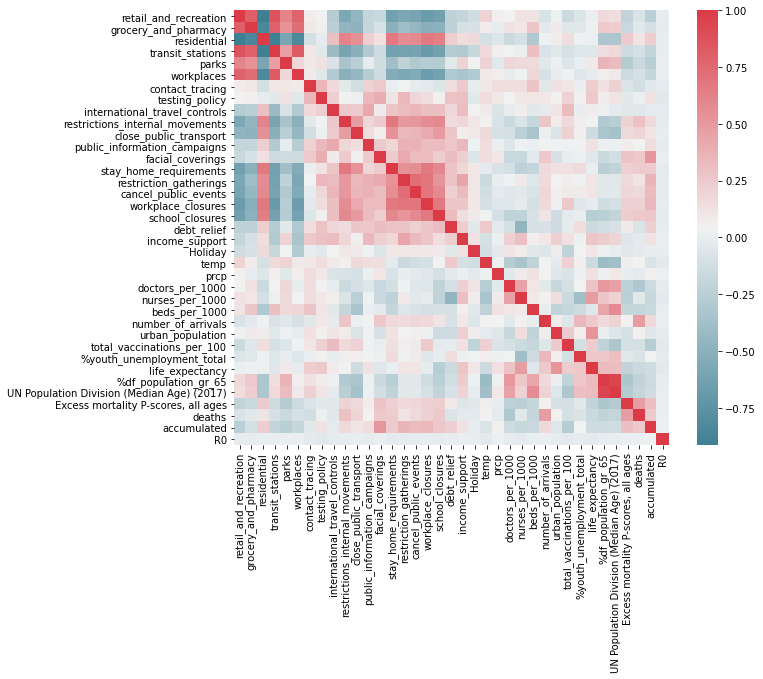

In [70]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

* There is a high multicollinearity between variables, Mobility trends are highly correlated with each other values close to 1
* There is also a high multicollinearity in restrictions, meaning restrictions are applied together
* Even more, there is multicollinearity between mobility trends and restrictions, which is something expected.
* Restrictions that most affect mobility seem to be "stay_at_home_requirements", "restrictions_gatherings", "cancel_public_events", "workplace_closures" and "school_closures"


### R0 Distribution 

Text(0.5, 1.0, 'R0')

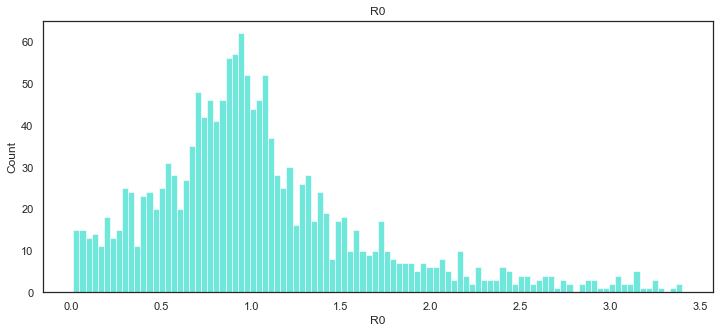

In [150]:
#Removing -inf and infinite
df=df[~df.isin([np.inf, -np.inf]).any(1)]
f, axes = plt.subplots(figsize=(12,5))
sns.histplot(x='R0', data=df, kde=False, bins=100, ax=axes, color='turquoise');
axes.set_title('R0')

Text(0.5, 1.0, 'R0')

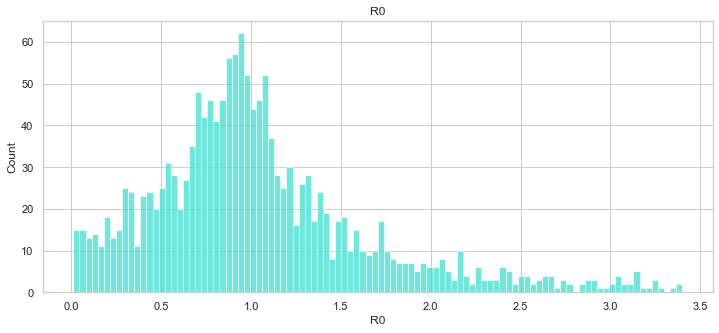

In [138]:
#Removing anomalious values, that is values smaller than zero, one person can in the minimum contagiate 0 people.
#It is recorded that the highest value of R0 is 3.4 therefore, any other value outside of that range will affect
#our predictions.
#Histogram of R0 after removal of anomalies

df=df[(np.abs(df['R0'])<3.4)]
df=df[df['R0']>0]
f, axes = plt.subplots(figsize=(12,5))
sns.histplot(x='R0', data=df, kde=False, bins=100, ax=axes, color='turquoise');
axes.set_title('R0')

In [132]:
df[['R0']].describe()

,R0
count,1547.000000
mean,1.044488
std,0.618392
min,0.011152
25%,0.668786
50%,0.940351
75%,1.297219
max,3.398876


### R0 distribution per country 

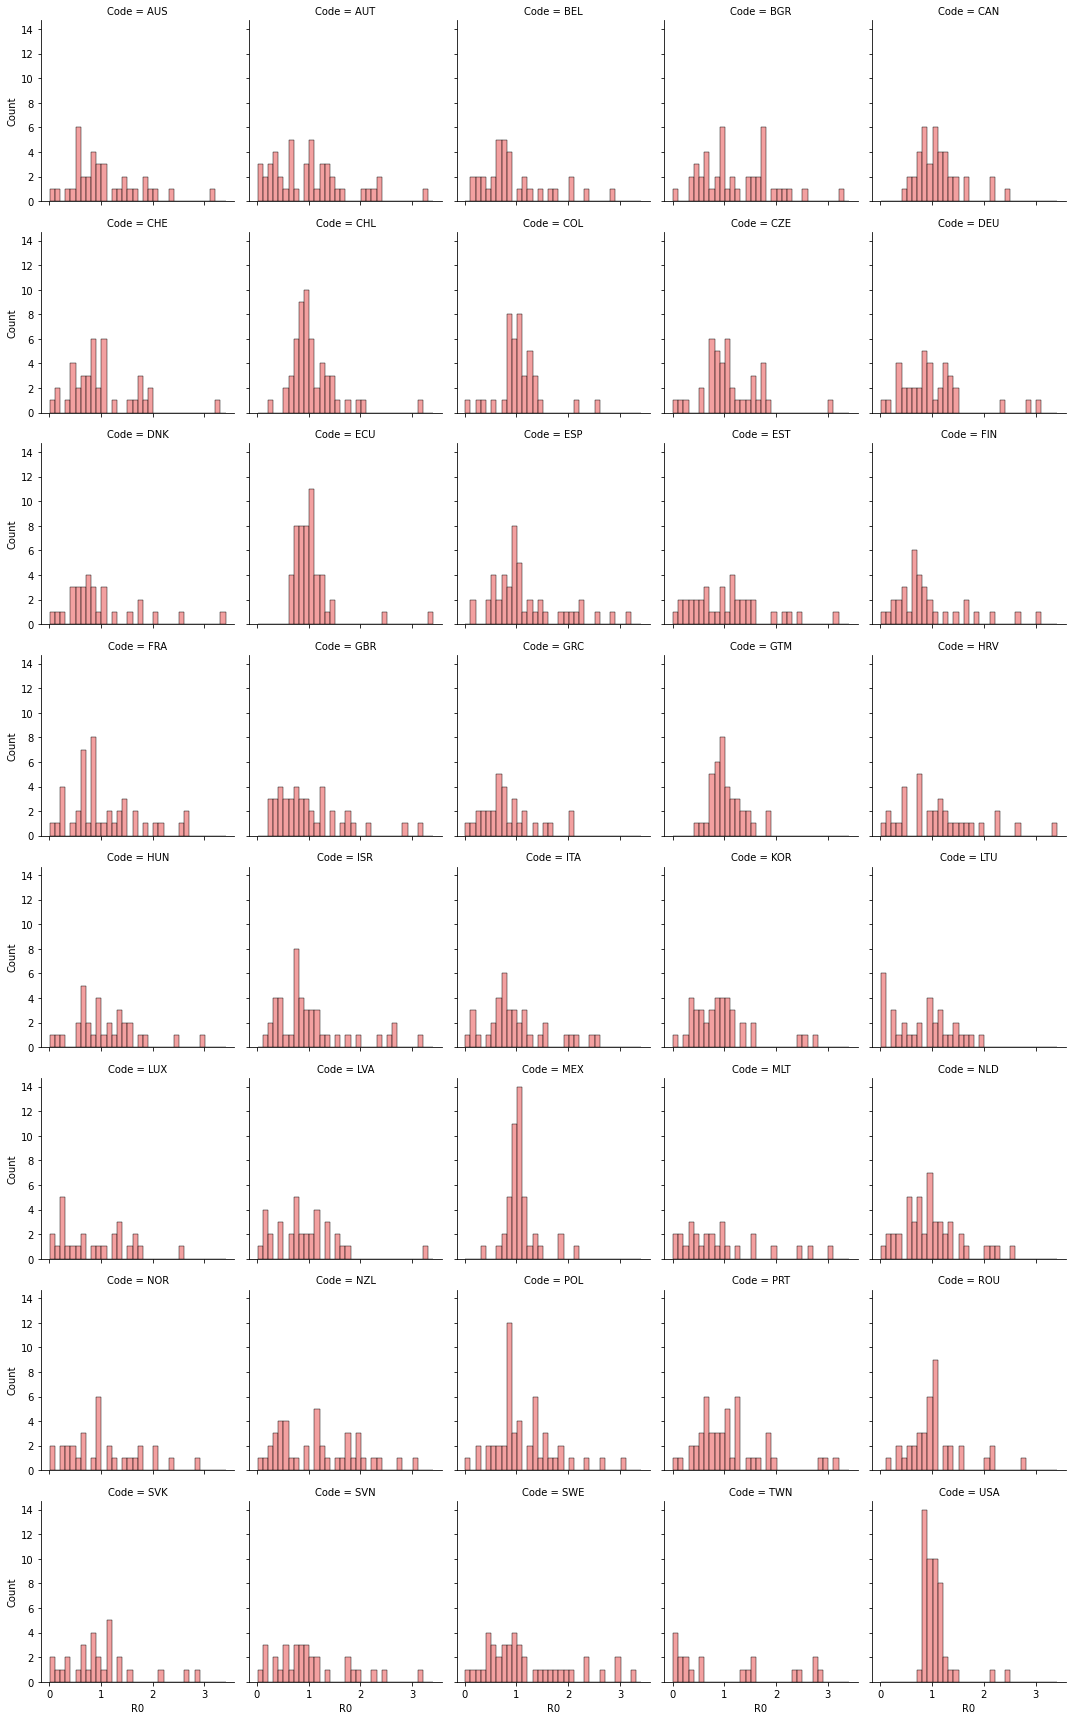

In [73]:
# Price distribution for route
sns.displot(
    df, x="R0", col="Code", col_wrap=5, kind='hist',
    binwidth=0.1, height=3, color='lightcoral');
plt.tight_layout()

### Percentage of population greater than 65 per country

<AxesSubplot:xlabel='Code', ylabel='Count'>

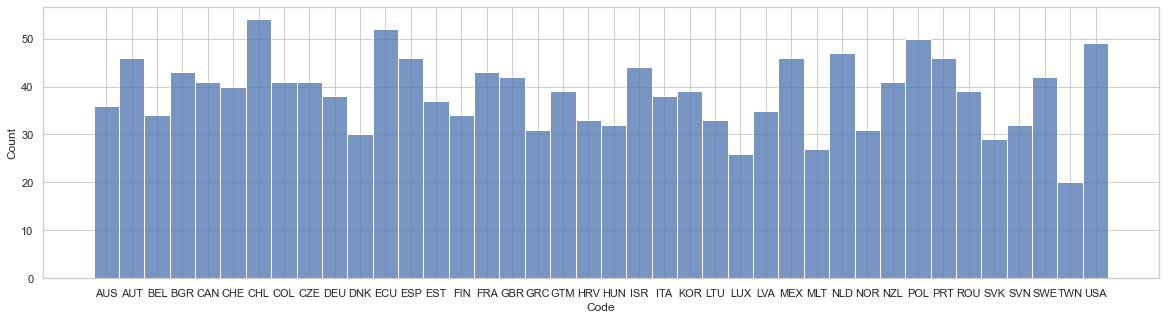

In [130]:
fig, ax = pyplot.subplots(figsize=(20,5))
df_pop_gr_65=df[['Code','%df_population_gr_65']]
sns.histplot(ax=ax, x='Code', data=df_pop_gr_65, palette='bwr')

### Restrictions boxplot

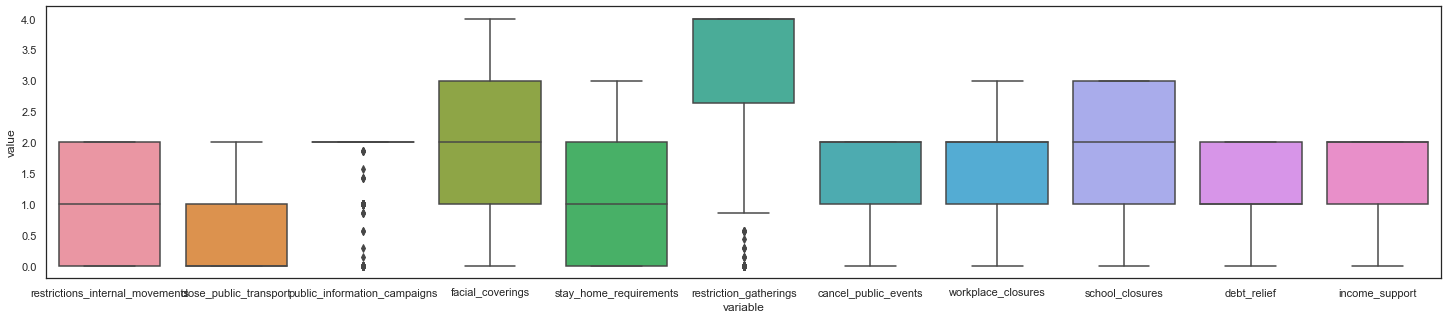

In [146]:
plt.subplots(figsize=(25,5))

df_restrictions=df[['restrictions_internal_movements', 'close_public_transport',
       'public_information_campaigns', 'facial_coverings',
       'stay_home_requirements', 'restriction_gatherings',
       'cancel_public_events', 'workplace_closures', 'school_closures',
       'debt_relief', 'income_support']]

sns.boxplot(x="variable", y="value",data=pd.melt(df_restrictions))
plt.show()

### Mobility Trends boxplot

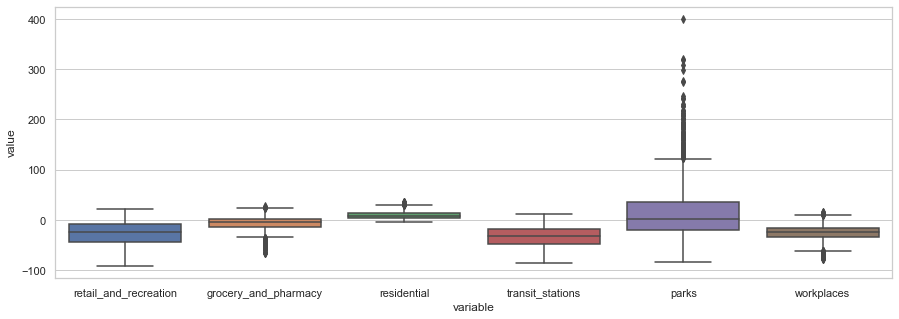

In [134]:
plt.subplots(figsize=(15,5))
sns.set_theme(style="whitegrid")

df_trends=df[['retail_and_recreation', 'grocery_and_pharmacy',
       'residential', 'transit_stations', 'parks', 'workplaces']]

sns.boxplot(x="variable", y="value",data=pd.melt(df_trends))
plt.show()

### Mobility Trends Pairplot

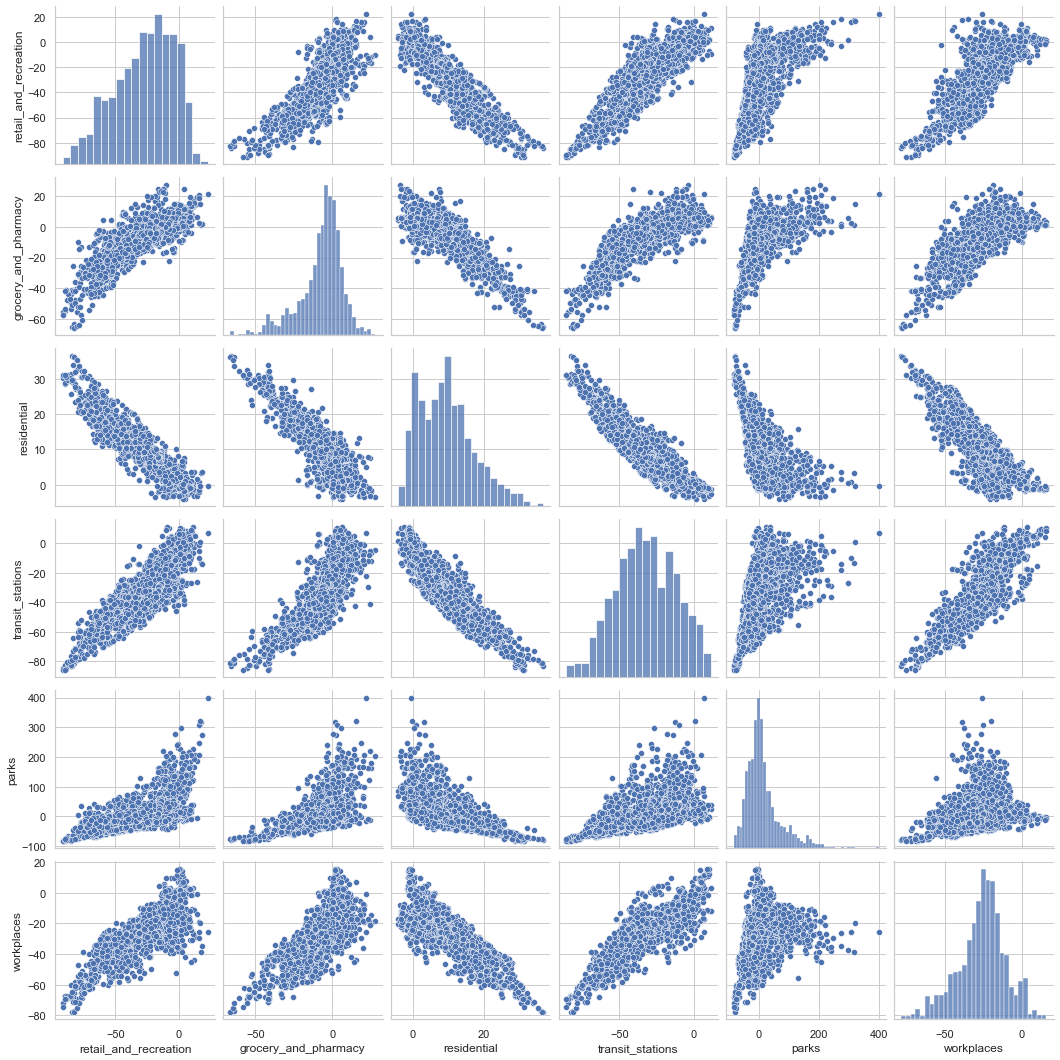

In [137]:
df_pairplot1=df[['retail_and_recreation', 'grocery_and_pharmacy',
       'residential', 'transit_stations', 'parks', 'workplaces']]
sns.pairplot(df_pairplot1)

## Accumulated deaths

<ipython-input-280-103e738214f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc['Date'] = pd.to_datetime(df_acc['Date'])


<AxesSubplot:xlabel='Date'>

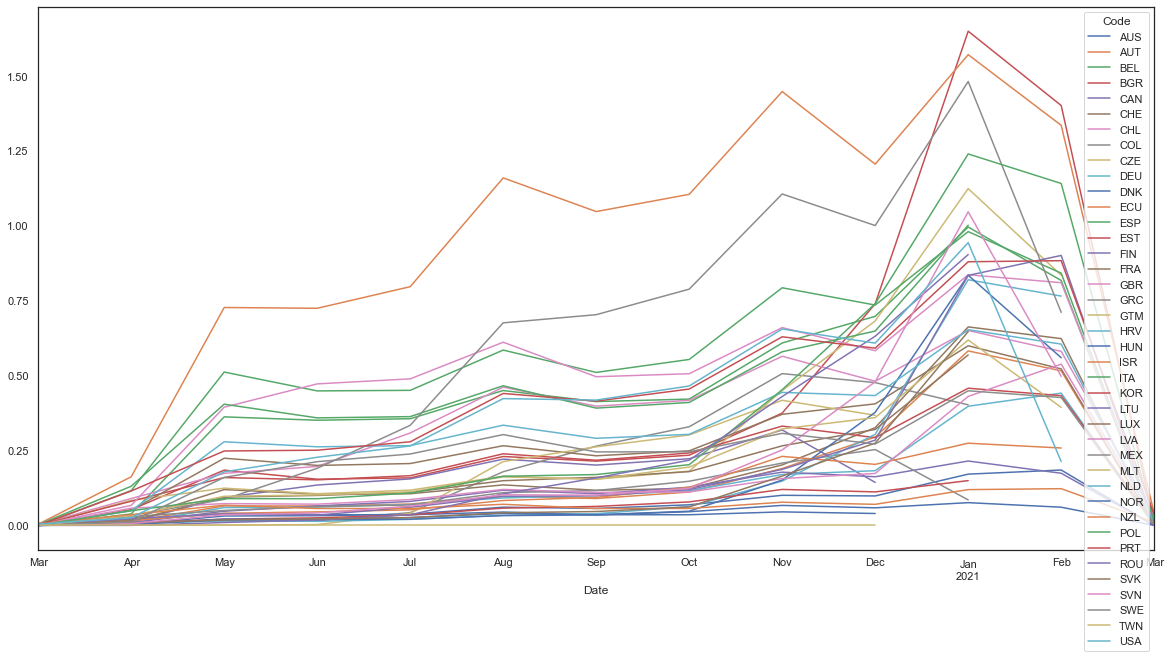

In [280]:
from matplotlib.pyplot import figure
df_acc=df[['Code', 'Date', 'accumulated']]
df_acc['Date'] = pd.to_datetime(df_acc['Date'])
df_acc=df_acc.groupby(by=[df_acc['Date'].dt.to_period('m'), df_acc['Code']]).sum().reset_index()
df_acc=df_acc.pivot(index="Date",columns="Code",values="accumulated")
plt.rcParams["figure.figsize"] = (20,10)
df_acc.plot()